In [ ]:
##### Author: Jimin Kim (jk55@uw.edu)
##### Version 1.5.0

# Lab 2 Report

In [ ]:
### Team name: Caitie and Tuan
### Group Members:Tuan Huynh, Caitlin DeShazo-Couchot

In [ ]:
import numpy as np

# Exercise 1: Loops vs Numpy operations

<img src="lab2_exercise1.png" width="1000">

In [ ]:
import time # Import time to measure computational efficiency of the code

In [ ]:
arr2d_1 = np.random.randn(1000, 1000) * 10
arr2d_2 = np.random.randn(1000, 1000) * 10

In [ ]:
# Elementwise addition using loop

arr2d_3_loop = np.zeros((1000, 1000)) # Create a placeholder array for arr2d_3

start_time_loop = time.time() # start time of the code

for i in range(0,1000):
    for j in range(0,1000):
        arr2d_3_loop[i,j]=arr2d_1[i,j]+arr2d_2[i,j]

end_time_loop = time.time() # end time of the code

elapsed_time_loop = end_time_loop - start_time_loop # end time - start time -> elapsed time in seconds
print(elapsed_time_loop)

In [ ]:
# Elementwise addition using Numpy function

start_time_np = time.time()

arr2d_3_np = np.add(arr2d_1,arr2d_2)
end_time_np = time.time()

elapsed_time_np= end_time_np - start_time_np
print(elapsed_time_np)

In [2]:
# Make sure two outputs are equivalent

np.sum(arr2d_3_loop == arr2d_3_np) == 1000 * 1000 # Should output True if the outputs are same

NameError: name 'arr2d_3_loop' is not defined

### Which computation is faster and by what factor?
### e.g. a code that takes 0.1s is faster by a factor of 10 compared to a code that takes 1s

Elementwise addition using Numpy function is faster than that using loop by a factor of elapsed_time_np/elapsed_time_loop

# Exercise 2: Generate Triangular Waveform

<img src="lab2_exercise2.png" width="1000">

<StemContainer object of 3 artists>

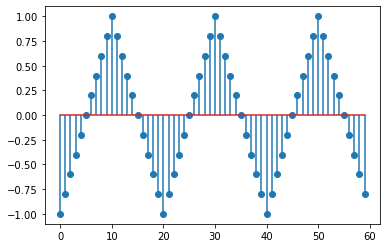

In [1]:
from scipy import signal   # import signal to use the function sawtooth for creating a triangular waveform
import numpy as np         
import matplotlib.pyplot as plt 
f=0.5  # f=frequency
a=1    # a=amplitude
t = np.arange(0, 6,1/10) # create an array of t
# define a function of triangular waveform with frequency and amplitude parameters
def triang(frequency, amplitude):
    return amplitude*signal.sawtooth(2*np.pi*frequency*t,0.5)
# Create a triangular waveform with particular frequency and amplitude
tr=triang(f,a)
# plot triangular waveform
plt.stem(t,tr)

# Exercise 3: Sinusoidal Generator

<img src="lab2_exercise3.png" width="1000">

In [ ]:
# Define generate_sine function

def generate_sine(t_duration, f0, fs):
    t_arr= np.arange(0,t_duration,1/fs)
    amplitudes=np.sin(2*np.pi*f0*t_arr)
    
    # Return 1D numpy arrays each containing timepoints and sine waveform amplitudes
    return t_arr, amplitudes 

In [ ]:
# parameter set 1
t_duration_1 = 5
f0_1 = 0.5
fs_1 = 100
t_arr_1, amplitudes_1 = generate_sine(t_duration_1, f0_1, fs_1)

# parameter set 2
t_duration_2 = 5
f0_2 = 1.
fs_2 = 100
t_arr_2, amplitudes_2 = generate_sine(t_duration_2, f0_2, fs_2)

# parameter set 3
t_duration_3 = 5
f0_3 = 1.5
fs_3 = 100
t_arr_3, amplitudes_3 = generate_sine(t_duration_3, f0_3, fs_3)

In [ ]:
# Plot 3 x 1 subplot showing all three waveform
# Plot sine waveform 1
plt.subplot(311)           # (number of rows, number of columns, current plot)
plt.plot(t_arr_1, amplitudes_1)
plt.title('sine waveform 1')
plt.xlabel('t_arr')
plt.ylabel('amplitudes')
# # Plot sine waveform 2
plt.subplot(312)
plt.plot(t_arr_2, amplitudes_2)
plt.title('sine waveform 2')
plt.xlabel('t_arr')
plt.ylabel('amplitudes')
# Plot sine waveform 3
plt.subplot(313)
plt.plot(t_arr_3, amplitudes_3)
plt.title('sine waveform 3')
plt.xlabel('t_arr')
plt.ylabel('amplitudes')

# Exercise 4: Notes Synthesis

<img src="lab2_exercise4.png" width="1000">

In [3]:
# Import scipy.io
from scipy.io import wavfile as wav
# Import simpleaudio
import simpleaudio as sa  
import numpy as np
# The generate_sine() function returns an array of sine waveform amplitudes
def generate_sine(t_duration, f0, fs):
    t_arr= np.arange(0,t_duration,1/fs)
    amplitudes=np.sin(2*np.pi*f0*t_arr)
    # Return 1D numpy array containing sine waveform amplitudes
    return amplitudes 
# Use the generate_sine() function to construct 8 notes that make up A-Major scale. Each note should last 1 second.
Note_A=generate_sine(1, 220, 8000)
Note_B=generate_sine(1, 220*2**(2/12), 8000)
Note_Csharp=generate_sine(1, 220*2**(4/12), 8000)
Note_D=generate_sine(1, 220*2**(5/12), 8000)
Note_E=generate_sine(1, 220*2**(7/12), 8000)
Note_Fsharp=generate_sine(1, 220*2**(9/12), 8000)
Note_Gsharp=generate_sine(1, 220*2**(11/12), 8000)
Note_A1=generate_sine(1, 440, 8000)
# Concatenate 8 notes into a single 1D array, and multiply concatenated notes with 32767 followed by conversion to int16 format
concatenate_notes=32767*np.concatenate([Note_A, Note_B, Note_Csharp, Note_D, Note_E, Note_Fsharp, Note_Gsharp, Note_A1])
# Set the name of the new audio file
outfile='a_major_scale.wav'
# Write new audio file with correct sampling frequency
wav.write(outfile, 8000, concatenate_notes.astype('int16'))
# Load the saved .wav file
wav_obj = sa.WaveObject.from_wave_file('a_major_scale.wav')    
# Validate the new audio file by playing it
play_obj = wav_obj.play()

In [ ]:
# NOTE: Multiply your concatenated notes (with amplitude of 1) with 32767 followed by conversion to int16 format
# before playing or writing your audio array into a file. 

# Exercise 5: Chord Synthesis

<img src="lab2_exercise5.png" width="1000">

In [2]:
# Import scipy.io
from scipy.io import wavfile as wav 
# Import simpleaudio
import simpleaudio as sa  
import numpy as np
# The generate_sine() function returns an array of sine waveform amplitudes
def generate_sine(t_duration, f0, fs):
    t_arr= np.arange(0,t_duration,1/fs)
    amplitudes=np.sin(2*np.pi*f0*t_arr)
    # Return 1D numpy array containing sine waveform amplitudes
    return amplitudes 
# Use the generate_sine() function to generate 6 chords, each chord consists of addition of two notes, last for 1s with sampling frequency of 8000Hz.
Chord_1=generate_sine(1, 220+220*2**(4/12), 8000)
Chord_2=generate_sine(1, 220*2**(2/12)+220*2**(5/12) , 8000)
Chord_3=generate_sine(1, 220*2**(4/12)+220*2**(7/12), 8000)
Chord_4=generate_sine(1, 220*2**(5/12)+220*2**(9/12), 8000)
Chord_5=generate_sine(1, 220*2**(7/12)+220*2**(11/12), 8000)
Chord_6=generate_sine(1, 220*2**(9/12)+440, 8000)
# Concatenate 6 chords into a single 1D array, and multiply concatenated chords with 32767 followed by conversion to int16 format
concatenate_chords=32767*np.concatenate([Chord_1, Chord_2, Chord_3, Chord_4, Chord_5, Chord_6])
# Set the name of the new audio file
outfile='6_chords.wav'
# Write new audio file with correct sampling frequency
wav.write(outfile, 8000, concatenate_chords.astype('int16'))  
# Load the saved .wav file
wav_obj = sa.WaveObject.from_wave_file('6_chords.wav') 
# Validate the new audio file by playing it
play_obj = wav_obj.play()

In [ ]:
# NOTE: Multiply your concatenated notes (with amplitude of 1) with 32767 followed by conversion to int16 format
# before playing or writing your audio array into a file. 